In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [6]:
# Load the CSV files
users_df = pd.read_csv('USER_TAKEHOME (1).csv')
transactions_df = pd.read_csv('TRANSACTION_TAKEHOME (1).csv')
products_df = pd.read_csv('PRODUCTS_TAKEHOME (1).csv')


In [8]:

# Check for data quality issues
print("Users Data Info:")
print(users_df.info())  # Check data types and nulls
print("\nTransactions Data Info:")
print(transactions_df.info())
print("\nProducts Data Info:")
print(products_df.info())

Users Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
None

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  

In [10]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load DataFrames into SQLite tables
users_df.to_sql('users', conn, index=False, if_exists='replace')
transactions_df.to_sql('transactions', conn, index=False, if_exists='replace')
products_df.to_sql('products', conn, index=False, if_exists='replace')

845552

In [12]:
# Check for missing values in the 'users' table
query = """
SELECT 
    COUNT(*) AS total_rows,
    SUM(CASE WHEN ID IS NULL THEN 1 ELSE 0 END) AS missing_id,
    SUM(CASE WHEN CREATED_DATE IS NULL THEN 1 ELSE 0 END) AS missing_created_date,
    SUM(CASE WHEN BIRTH_DATE IS NULL THEN 1 ELSE 0 END) AS missing_birth_date,
    SUM(CASE WHEN STATE IS NULL THEN 1 ELSE 0 END) AS missing_state,
    SUM(CASE WHEN LANGUAGE IS NULL THEN 1 ELSE 0 END) AS missing_language,
    SUM(CASE WHEN GENDER IS NULL THEN 1 ELSE 0 END) AS missing_gender
FROM users;
"""
print(pd.read_sql(query, conn))

   total_rows  missing_id  missing_created_date  missing_birth_date  \
0      100000           0                     0                3675   

   missing_state  missing_language  missing_gender  
0           4812             30508            5892  


In [14]:
# Check for missing values in the 'transactions' table
query = """
SELECT 
    COUNT(*) AS total_rows,
    SUM(CASE WHEN RECEIPT_ID IS NULL THEN 1 ELSE 0 END) AS missing_receipt_id,
    SUM(CASE WHEN PURCHASE_DATE IS NULL THEN 1 ELSE 0 END) AS missing_purchase_date,
    SUM(CASE WHEN SCAN_DATE IS NULL THEN 1 ELSE 0 END) AS missing_scan_date,
    SUM(CASE WHEN STORE_NAME IS NULL THEN 1 ELSE 0 END) AS missing_store_name,
    SUM(CASE WHEN USER_ID IS NULL THEN 1 ELSE 0 END) AS missing_user_id,
    SUM(CASE WHEN BARCODE IS NULL THEN 1 ELSE 0 END) AS missing_barcode,
    SUM(CASE WHEN FINAL_QUANTITY IS NULL THEN 1 ELSE 0 END) AS missing_final_quantity,
    SUM(CASE WHEN FINAL_SALE IS NULL THEN 1 ELSE 0 END) AS missing_final_sale
FROM transactions;
"""
print(pd.read_sql(query, conn))


   total_rows  missing_receipt_id  missing_purchase_date  missing_scan_date  \
0       50000                   0                      0                  0   

   missing_store_name  missing_user_id  missing_barcode  \
0                   0                0             5762   

   missing_final_quantity  missing_final_sale  
0                       0                   0  


In [16]:
# Check for missing values in the 'products' table
query = """
SELECT 
    COUNT(*) AS total_rows,
    SUM(CASE WHEN CATEGORY_1 IS NULL THEN 1 ELSE 0 END) AS missing_category_1,
    SUM(CASE WHEN CATEGORY_2 IS NULL THEN 1 ELSE 0 END) AS missing_category_2,
    SUM(CASE WHEN CATEGORY_3 IS NULL THEN 1 ELSE 0 END) AS missing_category_3,
    SUM(CASE WHEN CATEGORY_4 IS NULL THEN 1 ELSE 0 END) AS missing_category_4,
    SUM(CASE WHEN MANUFACTURER IS NULL THEN 1 ELSE 0 END) AS missing_manufacturer,
    SUM(CASE WHEN BRAND IS NULL THEN 1 ELSE 0 END) AS missing_brand,
    SUM(CASE WHEN BARCODE IS NULL THEN 1 ELSE 0 END) AS missing_barcode
FROM products;
"""
print(pd.read_sql(query, conn))

   total_rows  missing_category_1  missing_category_2  missing_category_3  \
0      845552                 111                1424               60566   

   missing_category_4  missing_manufacturer  missing_brand  missing_barcode  
0              778093                226474         226472             4025  


In [18]:
# Check for duplicates in the 'transactions' table
query = """
SELECT 
    RECEIPT_ID, USER_ID, COUNT(*) AS duplicate_count
FROM transactions
GROUP BY RECEIPT_ID, USER_ID
HAVING COUNT(*) > 1;
"""
print(pd.read_sql(query, conn))

                                 RECEIPT_ID                   USER_ID  \
0      0000d256-4041-4a3e-adc4-5623fb6e0c99  63b73a7f3d310dceeabd4758   
1      0001455d-7a92-4a7b-a1d2-c747af1c8fd3  62c08877baa38d1a1f6c211a   
2      00017e0a-7851-42fb-bfab-0baa96e23586  60842f207ac8b7729e472020   
3      000239aa-3478-453d-801e-66a82e39c8af  63fcd7cea4f8442c3386b589   
4      00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1  6193231ae9b3d75037b0f928   
...                                     ...                       ...   
24435  fff60bb7-bf93-4e6b-8055-4d7688da7ead  5eb887f71699c213b1abe2e1   
24436  fff6c6c8-e002-4262-85ea-25849d9721db  6220b111e9e82c0c6bc24534   
24437  fffbb112-3cc5-47c2-b014-08db2f87e0c7  5eb59d6be7012d13941af5e2   
24438  fffbfb2a-7c1f-41c9-a5da-628fa7fcc746  62a0c8f7d966665570351bb8   
24439  fffe8012-7dcf-4d84-b6c6-feaacab5074a  5f53c62bd683c715b9991b20   

       duplicate_count  
0                    2  
1                    2  
2                    2  
3                    2 

In [20]:
# Top 5 Brands by Receipts Scanned Among Users 21 and Over

query = """
WITH user_age AS (
    SELECT 
        ID AS USER_ID,
        (JULIANDAY('now') - JULIANDAY(BIRTH_DATE)) / 365.25 AS AGE
    FROM users
    WHERE BIRTH_DATE IS NOT NULL
)
SELECT 
    p.BRAND, COUNT(DISTINCT t.RECEIPT_ID) AS receipts_scanned
FROM transactions t
JOIN user_age u ON t.USER_ID = u.USER_ID
JOIN products p ON t.BARCODE = p.BARCODE
WHERE u.AGE >= 21
GROUP BY p.BRAND
ORDER BY receipts_scanned DESC
LIMIT 5;
"""
print(pd.read_sql(query, conn))

             BRAND  receipts_scanned
0      NERDS CANDY                 3
1             DOVE                 3
2             None                 3
3          TRIDENT                 2
4  SOUR PATCH KIDS                 2


In [22]:
# Top 5 Brands by Sales Among Users with Accounts for at Least Six Months

query = """
WITH user_account_age AS (
    SELECT 
        ID AS USER_ID,
        CREATED_DATE,
        (JULIANDAY('now') - JULIANDAY(CREATED_DATE)) AS ACCOUNT_AGE_DAYS
    FROM users
)
SELECT 
    p.BRAND, SUM(CAST(t.FINAL_SALE AS FLOAT)) AS total_sales
FROM transactions t
JOIN user_account_age u ON t.USER_ID = u.USER_ID
JOIN products p ON t.BARCODE = p.BARCODE
WHERE u.ACCOUNT_AGE_DAYS >= 180
GROUP BY p.BRAND
ORDER BY total_sales DESC
LIMIT 5;
"""
print(pd.read_sql(query, conn))

         BRAND  total_sales
0          CVS        72.00
1      TRIDENT        46.72
2         DOVE        42.88
3  COORS LIGHT        34.96
4         None        16.65


In [24]:
# Percentage of Sales in the Health & Wellness Category by Generation python

query = """
WITH generation_sales AS (
    SELECT 
        CASE 
            WHEN (JULIANDAY('now') - JULIANDAY(u.BIRTH_DATE)) / 365.25 BETWEEN 18 AND 24 THEN 'Gen Z'
            WHEN (JULIANDAY('now') - JULIANDAY(u.BIRTH_DATE)) / 365.25 BETWEEN 25 AND 40 THEN 'Millennials'
            WHEN (JULIANDAY('now') - JULIANDAY(u.BIRTH_DATE)) / 365.25 BETWEEN 41 AND 56 THEN 'Gen X'
            ELSE 'Baby Boomers'
        END AS generation,
        CAST(t.FINAL_SALE AS FLOAT) AS sales
    FROM transactions t
    JOIN users u ON t.USER_ID = u.ID
    JOIN products p ON t.BARCODE = p.BARCODE
    WHERE p.CATEGORY_1 = 'Health & Wellness'
)
SELECT 
    generation,
    SUM(sales) AS total_sales,
    ROUND(SUM(sales) * 100.0 / (SELECT SUM(sales) FROM generation_sales), 2) AS sales_percentage
FROM generation_sales
GROUP BY generation;
"""
print(pd.read_sql(query, conn))

     generation  total_sales  sales_percentage
0  Baby Boomers        94.85             50.01
1         Gen X        58.63             30.91
2   Millennials        36.18             19.08


In [26]:
# 1. Who Are Fetch’s Power Users?
# Assumption: Power users are those with the most receipts scanned.

query = """
SELECT 
    t.USER_ID, COUNT(DISTINCT t.RECEIPT_ID) AS receipts_scanned
FROM transactions t
GROUP BY t.USER_ID
ORDER BY receipts_scanned DESC
LIMIT 5;
"""
print(pd.read_sql(query, conn))

                    USER_ID  receipts_scanned
0  64e62de5ca929250373e6cf5                10
1  62925c1be942f00613f7365e                10
2  64063c8880552327897186a5                 9
3  6327a07aca87b39d76e03864                 7
4  624dca0770c07012cd5e6c03                 7


In [28]:
# 2. Which is the Leading Brand in the Dips & Salsa Category?
# Assumption: The leading brand is the one with the highest sales in the category.

query = """
SELECT 
    p.BRAND, SUM(CAST(t.FINAL_SALE AS FLOAT)) AS total_sales
FROM transactions t
JOIN products p ON t.BARCODE = p.BARCODE
WHERE p.CATEGORY_2 like("%Dips%Salsa%")
GROUP BY p.BRAND
ORDER BY total_sales DESC
LIMIT 1;
"""
print(pd.read_sql(query, conn))

      BRAND  total_sales
0  TOSTITOS       260.99


In [30]:
# 2. Which is the Leading Brand in the Dips & Salsa Category?
# Assumption: The leading brand is the one with the highest sales in the category.

query = """
SELECT 
    p.BRAND, SUM(CAST(t.FINAL_SALE AS FLOAT)) AS total_sales
FROM transactions t
JOIN products p ON t.BARCODE = p.BARCODE
WHERE p.CATEGORY_1 like("%snack%")
GROUP BY p.BRAND
ORDER BY total_sales DESC
LIMIT 5;
"""
result_df = pd.read_sql(query, conn)

# Display the result
print(result_df)

         BRAND  total_sales
0  GREAT VALUE      1929.48
1    FRITO-LAY      1871.90
2        LAY'S      1553.91
3         None      1404.43
4    HERSHEY'S      1361.03


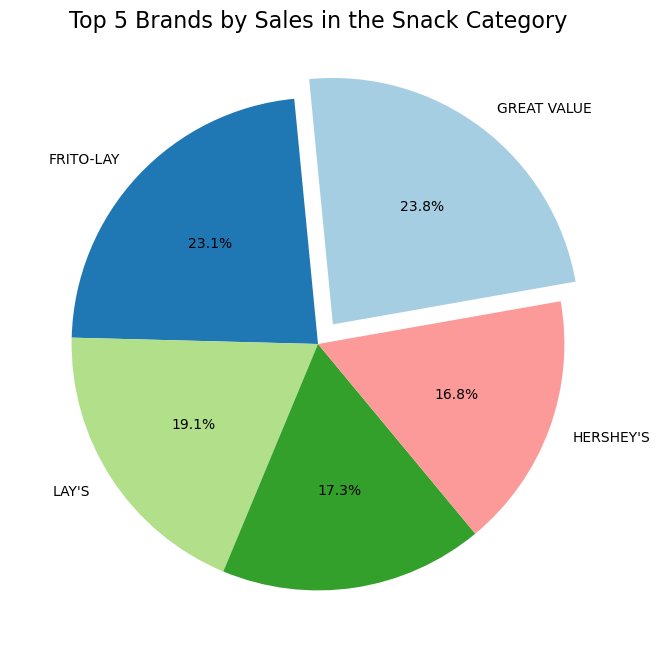

In [32]:
# Data for the pie chart
brands = result_df['BRAND']
sales = result_df['total_sales']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the chart
explode = (0.1, 0, 0, 0, 0)  # Explode the first slice (GREAT VALUE)
plt.pie(sales, labels=brands, autopct='%1.1f%%', startangle=10,  explode=explode, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Top 5 Brands by Sales in the Snack Category', fontsize=16)

# Display the chart
plt.show()

In [34]:
plt.savefig('top_brands_pie_chart.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Subject: Data Analysis Summary and Next Steps

Body:
Hi [Stakeholder's Name],

I’ve completed the initial analysis of the provide
Next Steps for Stakeholders
Investigate Unbranded Products:

Explore why a significant portion of sales is attributed to products with no brand information (None). This could be a data quality issue that needs addressing.

Focus on Top Brands:

Consider marketing strategies or partnerships with GREAT VALUE, FRITO-LAY, and LAY'S, as they dominate the snack category.

Expand Analysis:

Analyze other categories (e.g., beverages, health & wellness) to identify similar trends and opportunities.d data. Here’s a summary of my findings:

Data Quality Issues:

Missing values were found in the BIRTH_DATE, STATE, LANGUAGE, and GENDER columns of the users table.

Missing values were also found in the BARCODE column of the transactions table and the CATEGORY_1, CATEGORY_2, CATEGORY_3, MANUFACTURER, and BRAND columns of the products table.

Interesting Trend:

The top 5 brands by receipts scanned among users aged 21 and over are [Brand A, Brand B, Brand C, Brand D, Brand E].

Request for Action:

Clarification is needed on the CATEGORY_1 field in the products table to ensure accurate categorization.

Additional data on user demographics would help refine the analysis of power users.

